#STROKE PREDICTION


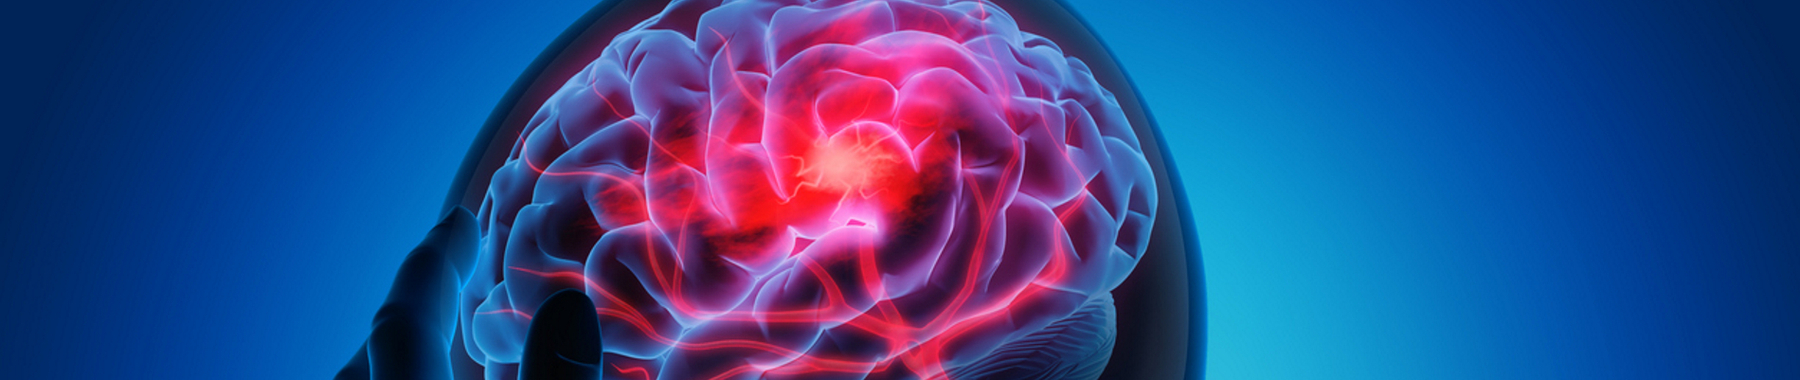

##How National Health System ([NHS](https://www.nhs.uk/conditions/stroke/#:~:text=A%20stroke%20is%20a%20serious,damage%20is%20likely%20to%20happen.)) define STROKE
"A stroke is a serious life-threatening medical condition that happens when the blood supply to part of the brain is cut off."
"Strokes are a medical emergency and urgent treatment is essential."
"The sooner a person receives treatment for a stroke, the less damage is likely to happen."
##Stroke in the perspective of the World Health Organization ([WHO](http://www.emro.who.int/health-topics/stroke-cerebrovascular-accident/index.html)):
"Annually, 15 million people worldwide suffer a stroke. Of these, 5 million die and another 5 million are left permanently disabled, placing a burden on family and community. Stroke is uncommon in people under 40 years; when it does occur, the main cause is high blood pressure. However, stroke also occurs in about 8% of children with sickle cell disease."

##About the Dataset
A brief summary of the [dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset):

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient. The dataset has one target (stroke), and 11 columns as described below:



1.   id: unique identifier
2.   gender: "Male", "Female" or "Other"
3.   age: age of the patient
4.   hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5.   heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6.   ever_married: "No" or "Yes"
7.   work_type: "children", "Govt_job", "Never_worked", "Private" or "Self-employed"
8.   Residence_type: "Rural" or "Urban"
9.   avg_glucose_level: average glucose level in blood
10.  bmi: body mass index
11.  smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12.  stroke: 1 if the patient had a stroke or 0 if not

**Note**: "Unknown" in smoking_status means that the information is unavailable for this patient.

# Import the required libraries

In [ ]:
# The basic libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import seaborn as sns

%matplotlib inline
sns.set_style('dark')

# Pywaffle to have an attractive visualization of the categorical data
!pip install pywaffle
from pywaffle import Waffle

# Sickit-Learn Preprocessing Package
from sklearn.preprocessing import (StandardScaler,
                                   LabelEncoder,
                                   OneHotEncoder)
from sklearn.model_selection import train_test_split

# Imbalanced-Data Processing Package
from imblearn.over_sampling import (RandomOverSampler, SMOTE)
from imblearn.combine import SMOTETomek

# Classifiers
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

# Evaluation Metrics
import time
from sklearn.metrics import (accuracy_score, 
                             auc, 
                             precision_score,
                             recall_score,
                             f1_score, 
                             roc_auc_score,
                             confusion_matrix)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.1 MB 66.3 MB/s 


# Import and Explore the Data

In [ ]:
df0= pd.read_csv("/healthcare-dataset-stroke-data.csv")
df0.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df0.shape

(5110, 12)

In [ ]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Initial sight of categorical and numerical data

In [ ]:
round(df0.describe(exclude='object'),2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.1,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.3,0.23,45.28,7.85,0.22
min,67.00,0.08,0.0,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.0,0.00,77.24,23.50,0.00
50%,36932.00,45.00,0.0,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.0,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


In [ ]:
round(df0.describe(exclude=['float', 'int64']),2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


From the intitial exploration above:
- There are two types of data in this dataset, categorical and numerical.
- 11 features are implemented in this dataset. And one binary target.
- Only the "bmi" feature has null values.

# Data Cleaning

Since the "id" feature is not useful in our analysis, we can drop it. After that, let's see if there are any duplicated. And then we deal with the missing values.

In [ ]:
df = df0.copy()

In [ ]:
df = df.drop(['id'], axis='columns')

##Duplicated values

In [ ]:
print(f"There are {df.duplicated().sum()} duplicated values in this data frame.")

There are 0 duplicated values in this data frame.


## Missing values

In [ ]:
df.isnull().sum().sort_values(ascending=False)

bmi                  201
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
smoking_status         0
stroke                 0
dtype: int64

There are missing values 201 in the "bmi" feature. Let's see the distribution of this feature to decide the right way to deal with missing values.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


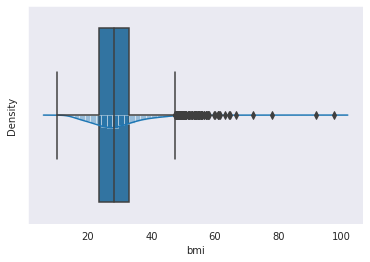

In [ ]:
sns.distplot(df['bmi']);
sns.boxplot(x='bmi', data=df);

Since there are a good number of outliers, we should avoid using the mean value to fill the nulls. So, we'll fill the null values with the median of the "bmi" values because the outliers don't have a significant effect on the median.

In [ ]:
df['bmi'] = df['bmi'].fillna(round (df['bmi'].median(), 2))

# Data Reconfiguration

In this section, we'll label each feature with the right data type (follow the [link](https://pbpython.com/pandas_dtypes.html) to see what are the data types of pandas data frames and how to convert between them).

In [ ]:
df[['hypertension', 'heart_disease', 'stroke']]= \
df[['hypertension', 'heart_disease', 'stroke']].astype('object')
df.dtypes

gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                object
dtype: object

# Exploratory Data Analysis (EDA)

In this section, we will visualize the dataset. Each feature has its own properties to discuss and explore more using data-visualization tools. Our tools mostly depend on Matplotlib and Seaborn libraries. [Kimberly Fessel](https://youtube.com/playlist?list=PLtPIclEQf-3cG31dxSMZ8KTcDG7zYng1j) presents a great tutorial on how to use the Seaborn library.

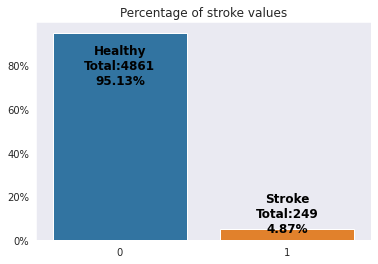

In [ ]:
stroke = df['stroke'].value_counts().sort_values(ascending=False).values
percent = (df['stroke'].value_counts()*100/len(df)).sort_values(ascending=False).values
idx = df['stroke'].value_counts().sort_values(ascending=False).index.values
ax = sns.barplot(data=df, x=idx, y=percent)
status = ['Healthy', 'Stroke']
#set y axis to percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('Percentage of stroke values')
for i,v in enumerate(percent):
    #(x position, y position, text, ...)
    ax.text(i, v-0.25*v, '{}\nTotal:{}\n{:.2f}%'.format(status[i], stroke[i],v), \
            horizontalalignment='center', weight='bold', color='black', fontsize=12)

From the bar plot, it is clear that every 5 people out of 100 people are having strokes from our sampling data. So, this is a highly imbalanced data distribution, and the null accuracy score of this distribution itself is 95%. To solve, while modeling and training based on the data, either oversampling or under-sampling has to be done to obtain the best results. Plus, sometimes we have to analyze and study the data of the stroke samples only.

## Univariate Data Analysis

### Numerical Data

In [ ]:
def plot_continuous_feature (dataframe, feature, hist_title, kde_title, text_position=[]):
  """Plot the continuous features (age, average glucose levels, BMI) as
  a histogram to evaluate its distribution and a KDE plot of the (Stroke, Healthy)
  samples seperately. The bars of the histogram are in red. The KDE plot of (Stroke, Healthy)
  are (blue, orange) respectively.

  Args:
  dataframe (Pandas data frame): The DataFrame to plot from.
  feature (Pandas series): The feature, continuous variable, that you want to plot.
  hist_title (String): The title of the histogram plot.
  kde_title (String): The title of the KDE plot.
  text_position (list): This list contains the positions of the texts as
                        [x1,y1,x2,y2,x3,y3]

  Returns:
  Figure of the feature you want to explore.
  """
  fig = plt.figure(figsize = (10,5))
  gs = fig.add_gridspec(10,10)
  ax1 = fig.add_subplot(gs[0:,0:4])
  ax2 = fig.add_subplot(gs[0:, 5:9])

  sns.histplot(data=dataframe, x=feature, color='red', ax=ax1)
  sns.kdeplot(data=dataframe[dataframe['stroke']==1], x=feature, shade=True, ax=ax2, color='blue')
  sns.kdeplot(data=dataframe[dataframe['stroke']==0], x=feature, shade=True, ax=ax2, color='orange')
  ax1.set_title(hist_title);
  ax2.set_title(kde_title);
  ax2.text(text_position[0],text_position[1],'Healthy', color='orange', fontsize=10, weight='bold');
  ax2.text(text_position[2],text_position[3], '|', color='black', weight='bold', fontsize=10);
  ax2.text(text_position[4],text_position[5], 'Stroke', color='blue', weight='bold', fontsize=10);

#### Age

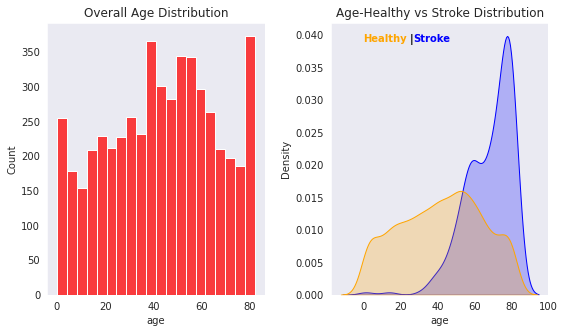

In [ ]:
plot_continuous_feature(dataframe=df, feature='age',
                        hist_title='Overall Age Distribution',
                        kde_title='Age-Healthy vs Stroke Distribution',
                        text_position = [0,0.039,25, 0.039,27,0.039])

We can see that the distribution of the "age" feature is not normal. And "age" is an important feature since we have a high density of stroke estimated at samples with high ages, mostly samples that are above 50 years old.

#### Average Glucose Level

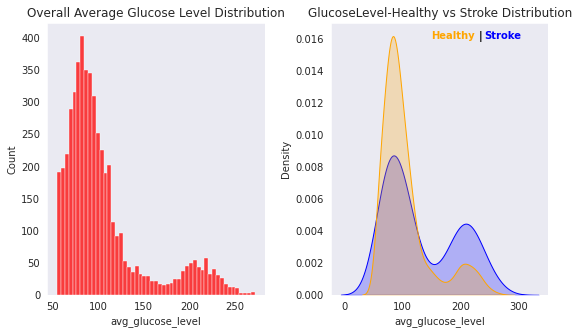

In [ ]:
plot_continuous_feature(dataframe=df, feature='avg_glucose_level',
                        hist_title='Overall Average Glucose Level Distribution',
                        kde_title='GlucoseLevel-Healthy vs Stroke Distribution',
                        text_position=[150, 0.016,230, 0.016,240, 0.016])

The majority of the samples are with a normal glucose level. But we cannot consider any useful conclusion, especially with the widespread overlapping glucose level values for the samples who got a stroke along with the healthy people. So it's still unclear which group of samples is affected by the average glucose level.

#### BMI

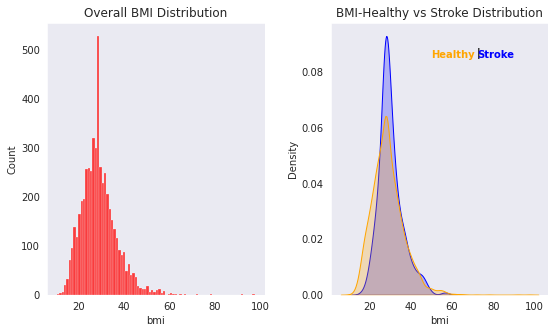

In [ ]:
plot_continuous_feature(dataframe=df, feature='bmi',
                        hist_title='Overall BMI Distribution',
                        kde_title='BMI-Healthy vs Stroke Distribution',
                        text_position=[50, 0.085,72, 0.08575, 72, 0.085])

The "bmi" feature is left-skewed. From the KDE plot, we can see that the higher the BMI, the higher the chances to get a stroke.

### Categorical Data

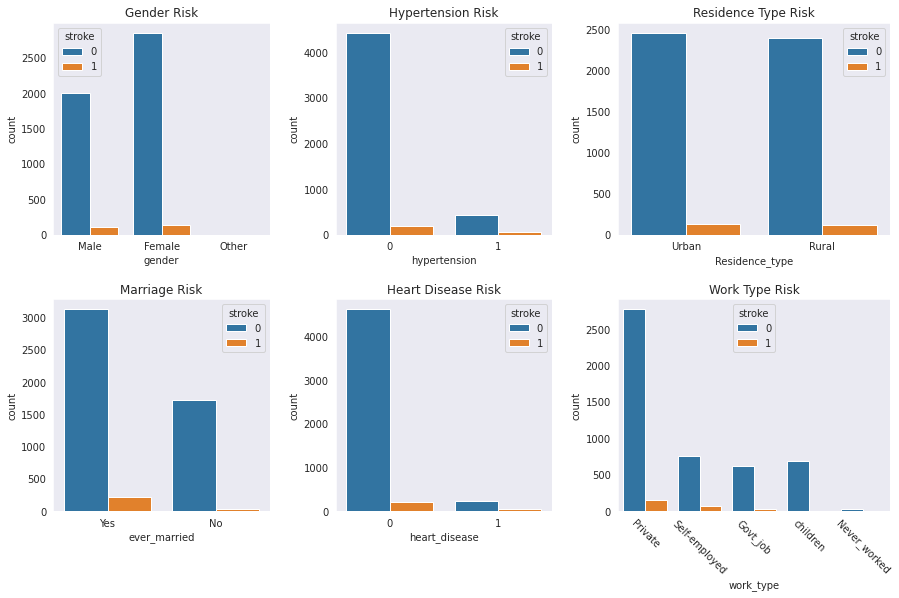

In [ ]:
fig = plt.figure(figsize=(15,10))
gs = fig.add_gridspec(10,15)
ax1 = fig.add_subplot(gs[0:4,0:4])
ax2 = fig.add_subplot(gs[5:9, 0:4])
ax3 = fig.add_subplot(gs[0:4,5:9])
ax4 = fig.add_subplot(gs[5:9, 5:9])
ax5 = fig.add_subplot(gs[0:4, 10:15])
ax6 = fig.add_subplot(gs[5:9, 10:15])

sns.countplot(data=df, x='gender', hue='stroke', ax=ax1)
sns.countplot(data=df, x='ever_married', hue='stroke', ax=ax2)
sns.countplot(data=df, x='hypertension', hue='stroke', ax=ax3)
sns.countplot(data=df, x='heart_disease', hue='stroke', ax=ax4)
sns.countplot(data=df, x='Residence_type', hue='stroke', ax=ax5)
sns.countplot(data=df, x='work_type', hue='stroke', ax=ax6)

ax1.set_title('Gender Risk');
ax2.set_title('Marriage Risk');
ax3.set_title('Hypertension Risk');
ax4.set_title('Heart Disease Risk');
ax5.set_title('Residence Type Risk');
ax6.set_title('Work Type Risk');
plt.xticks(rotation=-45);

The data here is very deceiving to analyze, because of the imbalanced data between the stroke samples and the healthy people. That's why we will inspect only the target samples sometimes, the stroke cases.

For Univariate Analysis of the categrical features, we will follow the same method for each of them.

For each Categorical Feature:
1.   Print the unique variables.
2.   Remove the duds.
3.   Calculate the percentage occurance for each unique value.
4.   Visualize the outcomes using Pywaffle.





Waffle plot is originally an R-visualization tool. It's not a built-in package in python. So, sometimes, we need to install the Pywaffle package using pip. To see more detail about Pywaffle, go to the official [website](https://pywaffle.readthedocs.io/en/latest/index.html). What's great about Pywaffle is that it's integrated with [Font Awesome](https://fontawesome.com/), which provides thousands of icons to implement in a waffle plot. With Pyaffle and Font-Awesome, you can build attractive and easy-to-understand visualizations.

#### Gender

In [ ]:
stroke_gender = df[df['stroke']==1]['gender'].value_counts().sort_values()
print(stroke_gender)

Male      108
Female    141
Name: gender, dtype: int64


It looks like we have one healthy sample labeled as "Other" gender. So, we can remove it from our study. After that, we will inspect the stroke and healthy samples as percentages.

In [ ]:
df= df.drop(df.loc[df['gender']=='Other'].index, axis='rows')

In [ ]:
def plot_category_feature (percentages, icons, title):
  """Generate a dictionary that can be used to configure the waffle plot of the
      categorical feature.

  Args:
  percentages (list): The list of the percentages of unique values of the categorical feature.
  icons (string): The icon fit to represent the data you are visualizing.
  title (string): The title of the unique value and the percentage of stroke cases.

  Returns:
  Dictionary that contains the parameters fit to a waffle plot.
  """
  dictionary_plot = {'rows':10,
                     'columns':10,
                     'values': percentages,
                     'vertical':True,
                     'interval_ratio_y':0.08,
                     'interval_ratio_x':0.08,
                     'colors':['#512b58','#fe346e'],
                     'icons': icons,
                     'icon_legend':False,
                     'icon_size':20,
                     'alpha':1,
                     'title':{'label':title+' (Stroke='+str(percentages[1])+'%)'}
                     }
  return dictionary_plot


def annotate_text(figure, title, title_position=(), healthy_position=(), stroke_position=()):
  """Add a title and a legend of the (Stroke,Healthy) combination at a specific position
  with the right colors.

  Args:
  figure (matplotlib figure): The figure you want to add the title and the legend to.
  title (string): The title of the figure.
  title_position (tuple): the coordinates of the title (x,y).
  healthy_position (tuple): the coordinates of the healthy legend (x,y).
  stroke_position (tuple): the coordinates of the stroke legend (x,y).

  Returns:
  Figure with a proper title and the (Stroke,Healthy) legend
  """
  figure.text(title_position[0], title_position[1], title, fontsize=15);
  figure.text(stroke_position[0], stroke_position[1], 'Stroke', color='#fe346e', weight='bold', fontsize=15)
  figure.text(healthy_position[0], healthy_position[1], 'Healthy', color='#512b58', weight='bold', fontsize=15)
  

In [ ]:
gender_stroke_percent = pd.crosstab(df['gender'],df['stroke'], normalize='index').round(2)*100
male_percent = [int(gender_stroke_percent.loc['Male'][0]), int(gender_stroke_percent.loc['Male'][1])]
female_percent = [int(gender_stroke_percent.loc['Female'][0]), int(gender_stroke_percent.loc['Female'][1])]

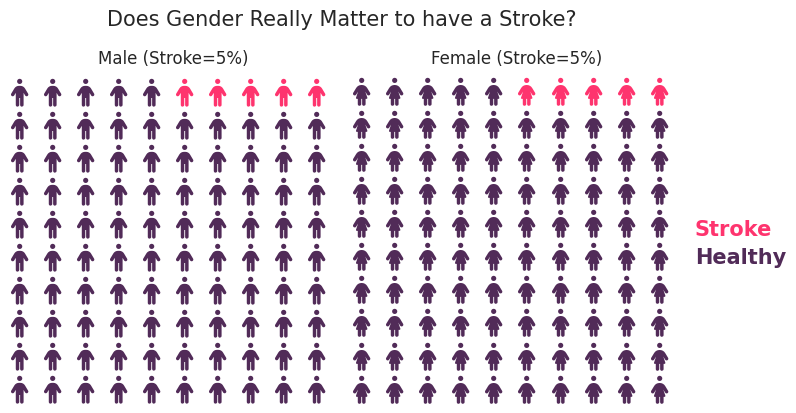

In [ ]:
fig = plt.figure(FigureClass = Waffle, constrained_layout = True, figsize = (7,7), dpi = 100,
                 plots = {'121':plot_category_feature(percentages=male_percent,
                                                      icons='male',
                                                      title='Male'),
                          '122':plot_category_feature(percentages=female_percent,
                                                      icons='female',
                                                      title='Female')});
                                                      
text = annotate_text(figure=fig, title='Does Gender Really Matter to have a Stroke?',
              title_position=(0.16, 0.8), healthy_position=(1,0.46), stroke_position=(1, 0.5));

It seems that gender does not affect the possibility of stroke in our dataset. The same percentage of stroke cases has happened for both males and females.

#### Hypertension

In [ ]:
hyper_stroke_percent = pd.crosstab(df['hypertension'],df['stroke'], normalize='index').round(2)*100
no_hyper_percent = [int(hyper_stroke_percent.loc[0][0]), int(hyper_stroke_percent.loc[0][1])]
hyper_percent = [int(hyper_stroke_percent.loc[1][0]), int(hyper_stroke_percent.loc[1][1])]

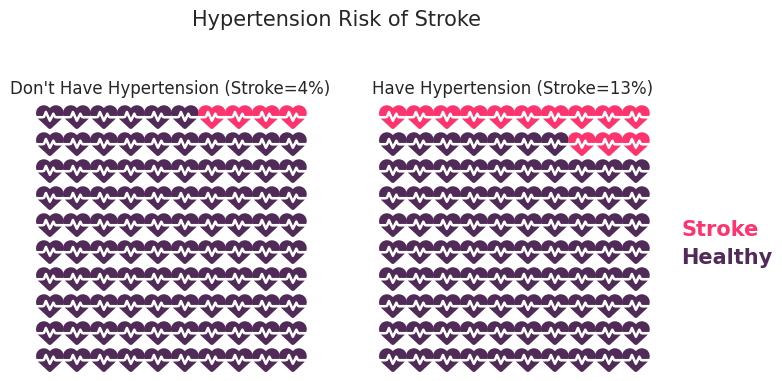

In [ ]:
fig = plt.figure(FigureClass = Waffle, constrained_layout = True, figsize = (7,7), dpi = 100,
                 plots = {'121':plot_category_feature(percentages=no_hyper_percent,
                                                      icons='heartbeat',
                                                      title='''Don't Have Hypertension'''),
                          '122':plot_category_feature(percentages=hyper_percent,
                                                      icons='heartbeat',
                                                      title='Have Hypertension')});

text = annotate_text(figure=fig, title='Hypertension Risk of Stroke',
              title_position=(0.3, 0.8), healthy_position=(1,0.46), stroke_position=(1, 0.5));

People with hypertension have about 9% higher risk to have a stroke, compared to people that don't have hypertension.

#### Heart Disease

In [ ]:
disease_stroke_percent = pd.crosstab(df['heart_disease'],df['stroke'], normalize='index').round(2)*100
no_disease_percent = [int(disease_stroke_percent.loc[0][0]), int(disease_stroke_percent.loc[0][1])]
disease_percent = [int(disease_stroke_percent.loc[1][0]), int(disease_stroke_percent.loc[1][1])]

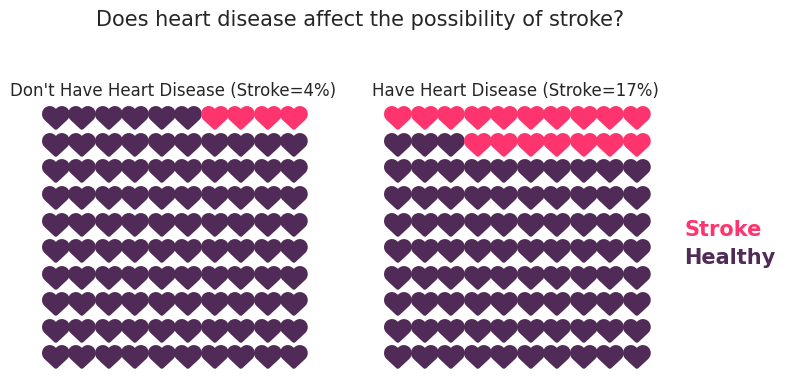

In [ ]:
fig = plt.figure(FigureClass = Waffle, constrained_layout = True, figsize = (7,7), dpi = 100,
                 plots = {'121':plot_category_feature(percentages=no_disease_percent,
                                                      icons='heart',
                                                      title='''Don't Have Heart Disease'''),
                          '122':plot_category_feature(percentages=disease_percent,
                                                      icons='heart',
                                                      title='Have Heart Disease')});

text = annotate_text(figure=fig, title='Does heart disease affect the possibility of stroke?',
              title_position=(0.16, 0.8), healthy_position=(1,0.46), stroke_position=(1, 0.5));

People with heart disease have about 13% higher risk to have a stroke, compared to people that don't have any heart disease.

#### Marriage Status

In [ ]:
marriage_stroke_percent = pd.crosstab(df['ever_married'],df['stroke'], normalize='index').round(2)*100
not_married_percent = [int(marriage_stroke_percent.loc['No'][0]), int(marriage_stroke_percent.loc['No'][1])]
married_percent = [int(marriage_stroke_percent.loc['Yes'][0]), int(marriage_stroke_percent.loc['Yes'][1])]

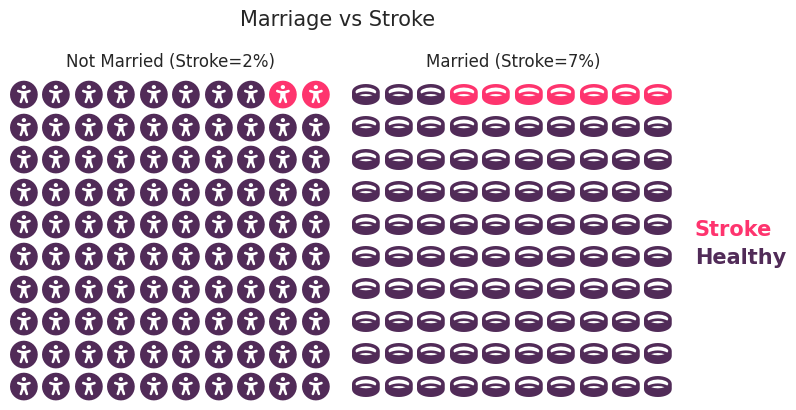

In [ ]:
fig = plt.figure(FigureClass = Waffle, constrained_layout = True, figsize = (7,7), dpi = 100,
                 plots = {'121':plot_category_feature(percentages=not_married_percent,
                                                      icons='universal-access',
                                                      title='Not Married'),
                          '122':plot_category_feature(percentages=married_percent,
                                                      icons='ring',
                                                      title='Married')});

text = annotate_text(figure=fig, title='Marriage vs Stroke',
              title_position=(0.35, 0.8), healthy_position=(1,0.46), stroke_position=(1, 0.5));

The risk of stroke for married people is relatively higher, about 5% than for single people.

#### Residence

In [ ]:
residence_stroke_percent = pd.crosstab(df['Residence_type'],df['stroke'], normalize='index').round(2)*100
urban_percent = [int(residence_stroke_percent.loc['Urban'][0]), int(residence_stroke_percent.loc['Urban'][1])]
rural_percent = [int(residence_stroke_percent.loc['Rural'][0]), int(residence_stroke_percent.loc['Rural'][1])]

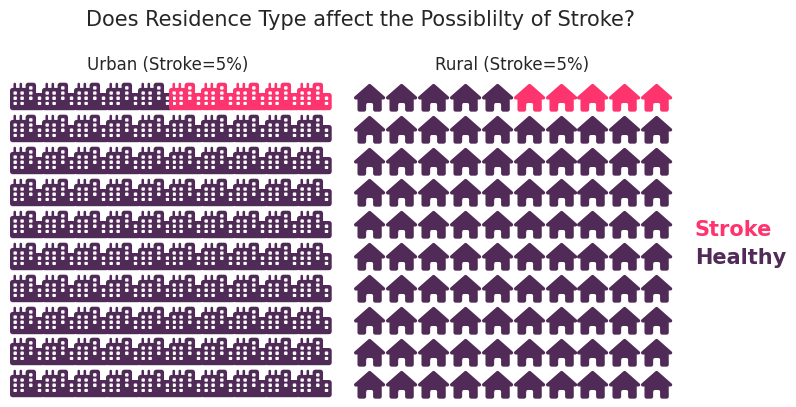

In [ ]:
fig = plt.figure(FigureClass = Waffle, constrained_layout = True, figsize = (7,7), dpi = 100,
                 plots = {'121':plot_category_feature(percentages=urban_percent,
                                                      icons='city',
                                                      title='Urban'),
                          '122':plot_category_feature(percentages=rural_percent,
                                                      icons='home',
                                                      title='Rural')});

text = annotate_text(figure=fig, title='Does Residence Type affect the Possiblilty of Stroke?',
              title_position=(0.13, 0.8), healthy_position=(1,0.46), stroke_position=(1, 0.5));

Residence type has no effect on stroke in our dataset.

#### Smoking Status

In [ ]:
smoking_stroke_percent = pd.crosstab(df['smoking_status'],df['stroke'], normalize='index').round(2)*100
never_percent = [int(smoking_stroke_percent.loc['never smoked'][0]), int(smoking_stroke_percent.loc['never smoked'][1])]
unknown_percent = [int(smoking_stroke_percent.loc['Unknown'][0]), int(smoking_stroke_percent.loc['Unknown'][1])]
formerly_percent = [int(smoking_stroke_percent.loc['formerly smoked'][0]), int(smoking_stroke_percent.loc['formerly smoked'][1])]
smokes_percent = [int(smoking_stroke_percent.loc['smokes'][0]), int(smoking_stroke_percent.loc['smokes'][1])]

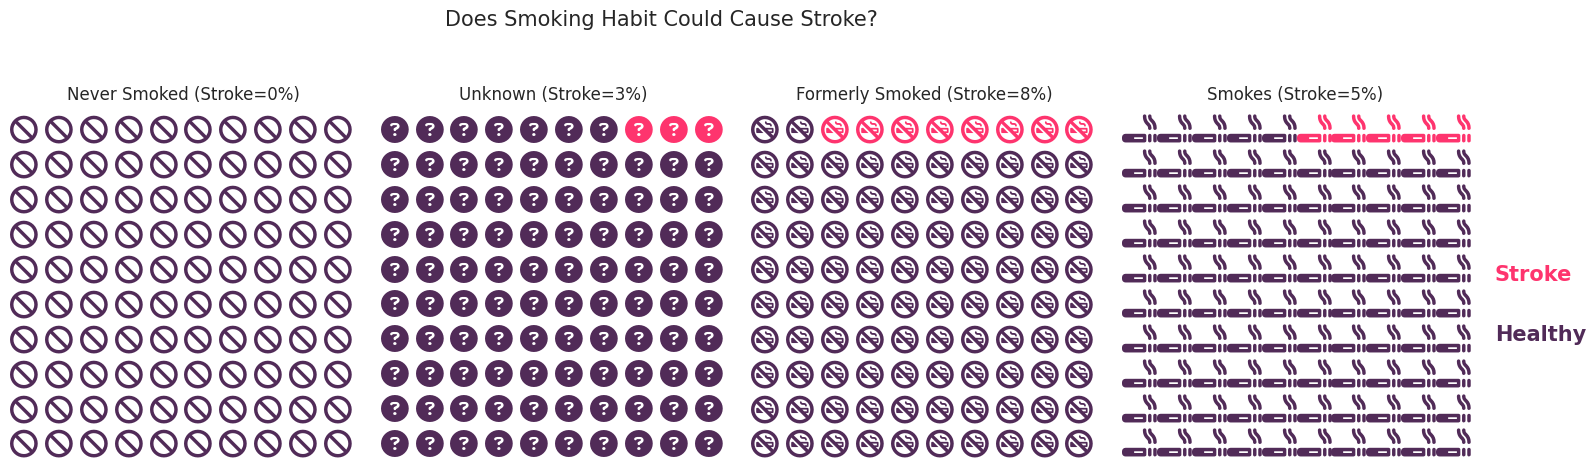

In [ ]:
fig = plt.figure(FigureClass = Waffle, constrained_layout = True, figsize = (15,15), dpi = 100,
                 plots = {'141':plot_category_feature(percentages=never_percent,
                                                      icons='ban',
                                                      title='Never Smoked'),
                          '142':plot_category_feature(percentages=unknown_percent,
                                                      icons='question-circle',
                                                      title='Unknown'),
                          '143':plot_category_feature(percentages=formerly_percent,
                                                      icons='smoking-ban',
                                                      title='Formerly Smoked'),
                          '144':plot_category_feature(percentages=smokes_percent,
                                                      icons='smoking',
                                                      title='Smokes')});

text = annotate_text(figure=fig, title='Does Smoking Habit Could Cause Stroke?',
              title_position=(0.3, 0.67), healthy_position=(1,0.46), stroke_position=(1, 0.5));

Surprisingly, "Formerly Smoked" people have a high risk of stroke. But "Smoking Status" is a very deceiving feature in this dataset. Because when we look at the plot above, we see that "never smoked" and "smokes" samples have the same percentage risk to have a stroke. Yet the number of samples for each group is highly imbalanced. Let's see the spread of the data related to stroke and smoking status.

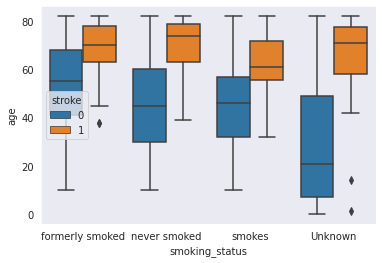

In [ ]:
sns.boxplot(x='smoking_status', y='age', hue='stroke', data=df);

Now it's more clear to see the differences by comparing the stroke boxes, the orange ones, of the two groups "never smoked" and "smokes". Notice that the box of stroke people whom they never smoked is higher than other boxes, with a higher median value, and that's because the "age" feature was really impactful on the risk of stroke. And we also see how the orange box of "smokes" people have moved down with the lowest median between stroke groups. That explains that smoking does have an effect on strokes. We can also see that healthy "Unknown" samples are mostly children and teens. And just two stroke cases have happened for young samples.

#### Work Type

In [ ]:
work_stroke_percent = pd.crosstab(df['work_type'],df['stroke'], normalize='index').round(2)*100
private_percent = [int(work_stroke_percent.loc['Private'][0]), int(work_stroke_percent.loc['Private'][1])]
self_employed_percent = [int(work_stroke_percent.loc['Self-employed'][0]), int(work_stroke_percent.loc['Self-employed'][1])]
children_percent = [int(work_stroke_percent.loc['children'][0]), int(work_stroke_percent.loc['children'][1])]
govt_percent = [int(work_stroke_percent.loc['Govt_job'][0]), int(work_stroke_percent.loc['Govt_job'][1])]
never_percent = [int(work_stroke_percent.loc['Never_worked'][0]), int(work_stroke_percent.loc['Never_worked'][1])]

/usr/local/lib/python3.7/dist-packages/IPython/core/events.py:88: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  func(*args, **kwargs)


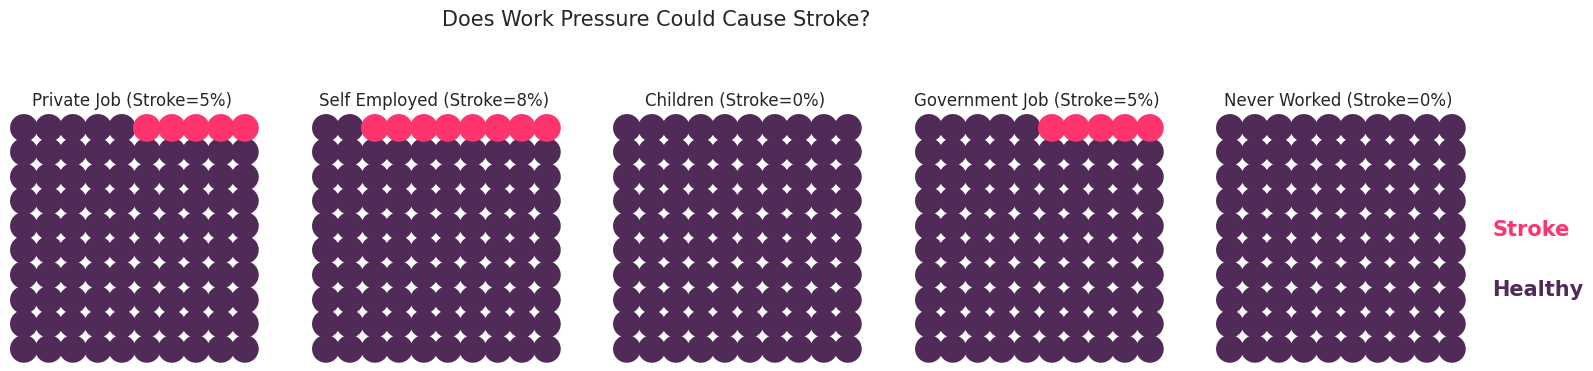

In [ ]:
fig = plt.figure(FigureClass = Waffle, constrained_layout = True, figsize = (15,15), dpi = 100,
                 plots = {'151':plot_category_feature(percentages=private_percent,
                                                      icons='circle',
                                                      title='Private Job'),
                          '152':plot_category_feature(percentages=self_employed_percent,
                                                      icons='circle',
                                                      title='Self Employed'),
                          '153':plot_category_feature(percentages=children_percent,
                                                      icons='circle',
                                                      title='Children'),
                          '154':plot_category_feature(percentages=govt_percent,
                                                      icons='circle',
                                                      title='Government Job'),
                          '155':plot_category_feature(percentages=never_percent,
                                                      icons='circle',
                                                      title='Never Worked')});

text = annotate_text(figure=fig, title='Does Work Pressure Could Cause Stroke?',
              title_position=(0.3, 0.64), healthy_position=(1,0.46), stroke_position=(1, 0.5));

It seems that the "never_worked" variable has no stroke cases.



The Self-Employed job type has the highest risk of stroke. Let's see if we can discover the reason.

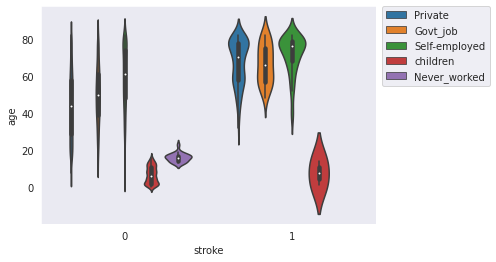

In [ ]:
sns.violinplot(x='stroke', y='age', data=df, hue='work_type',\
            hue_order=['Private','Govt_job','Self-employed','children','Never_worked'])
plt.legend(borderaxespad=0, bbox_to_anchor=(1.02, 1))

Text(0.5, 1.0, 's')

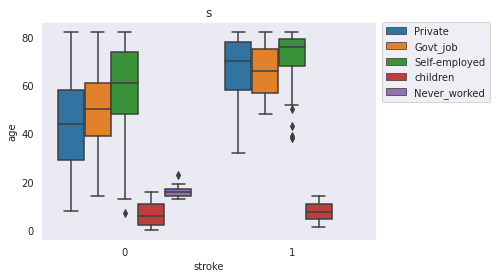

In [ ]:
sns.boxplot(x='stroke', y='age', data=df, hue='work_type',\
            hue_order=['Private','Govt_job','Self-employed','children','Never_worked'])
plt.legend(borderaxespad=0, bbox_to_anchor=(1.02, 1))
plt.title('s')

from the two plots above, we see that most of the samples with "Self-employed" are at high ages. So, maybe the "Self-employed" variable is highly affected by the "age" feature. Also, from the violin plot, notice the widespread of the stroke cases in "Govt_job" compared with "Private". So, we see that the "Govt_job" is riskier to have a stroke compared with the "Private" job.

## Visualization of Correlations Between Various Features

In this section, we start with encoding the categorical features, which will be a part of the preprocessing procedure of the data to train the models. But we use the encoding methods here to see the correlation between the stroke and the features. We will use the dendrogram to assess what features are the closest to the stroke cases. We will encode the categorical features using two methods in order to avoid biases while training. We will use LabelEncoder on the categories with two unique values that could be ordinal. And for the categories that have 3 or more unique values and don't have any ordinal meaning, we will use the get_dummies method on it. get_dummies method does nearly the same as OneHotEncoder. [Analyticsvidhya](https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/) presents a good explanation on the differences between LebelEncoder and OneHotEncoder.

In [ ]:
df2 = df.copy()

le = LabelEncoder()
ss = StandardScaler()

ordinal = ['hypertension', 'heart_disease', 'stroke']
nominal = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numerical = ['age', 'bmi', 'avg_glucose_level']

for column in ordinal:
  df2[column] = le.fit_transform(df2[column])

df2[numerical] = ss.fit_transform(df2[numerical])

dummies = pd.get_dummies(df2[nominal])
df2 = pd.concat([df2,dummies], axis='columns')

In [ ]:
df2=df2.drop(columns=nominal)

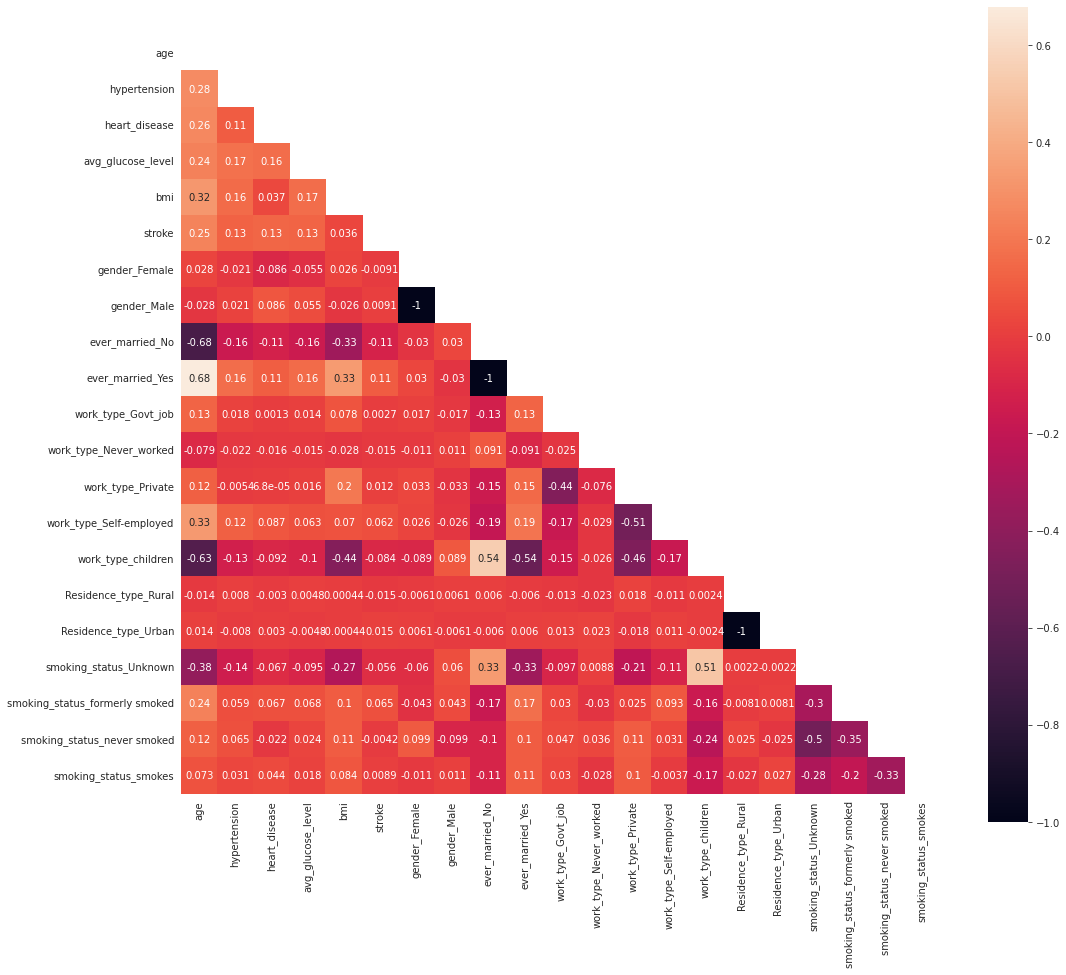

In [ ]:
correlation= df2.corr()
mask = np.zeros_like(correlation)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(17, 15))
    ax = sns.heatmap(correlation, mask=mask, square=True, annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:1214: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


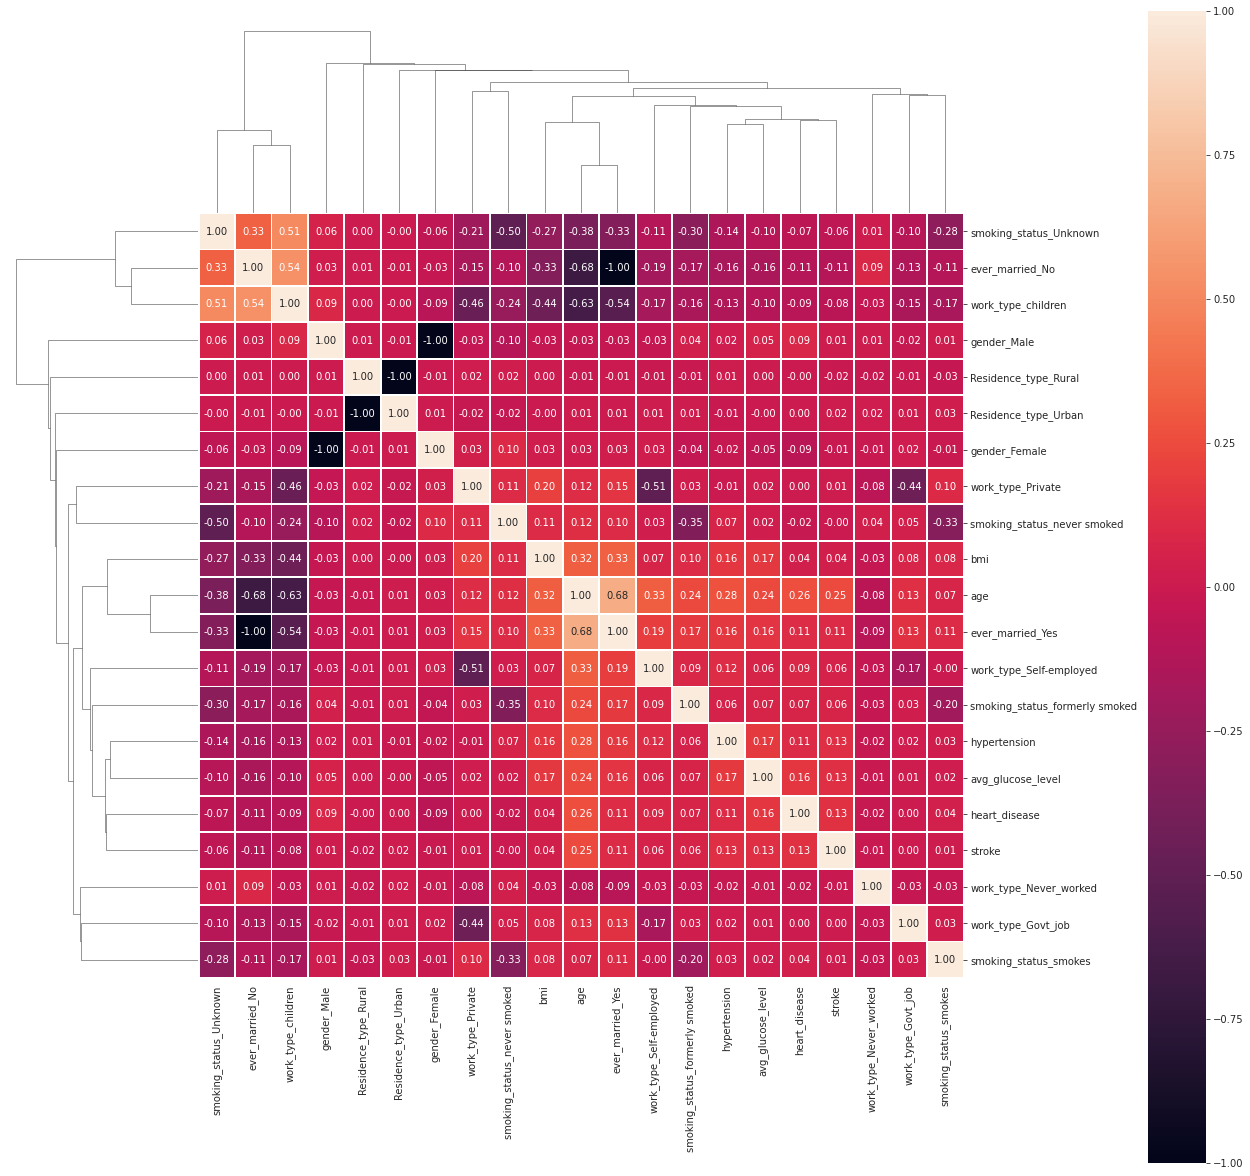

In [ ]:
g = sns.clustermap(correlation, annot = True, fmt = '0.2f',
                   cbar= True, cbar_pos=(1,0, 0.05,1),linewidth = 0.8,
                   facecolor = '#f6f5f5', figsize = (16,16),square = True );

# Imbalanced Data Problem

In [ ]:
df2['stroke'].value_counts(normalize=True)

0    0.951262
1    0.048738
Name: stroke, dtype: float64

As we see, the dataset is highly imbalanced. Only about 5% of the data are stroke samples. So, in case we have a model with 95% accuracy, the model might end up ignoring all the stroke cases. To solve this problem, we need to use a sampling method that gives us more stroke cases and makes the data balanced. Let's first see How a classifier deals with the imbalanced situation. After that we will try many sampling techniques, specifically oversampling techniques because we don't have enough data for stroke cases to build models based on downsampling techniques. Then we will test the sampling methods with LogisticRegression classifier to see what's the best method in our case.

To understand the following steps, [Tara Boyle](https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18) and [JustIntoData](https://www.justintodata.com/imbalanced-data-machine-learning-classification/) are the great place to start with.

In [ ]:
#df2 = df2.drop(df2[(df2['age']<-1)&(df2['stroke']==1)].index)

In [ ]:
df_train, df_test = train_test_split(df2, test_size=0.25, stratify=df2['stroke'], random_state=2021)

features = df_train.drop(columns=['stroke']).columns
X_train = df_train.drop(columns=['stroke'])
X_test = df_test.drop(columns=['stroke'])
y_train = df_train['stroke']
y_test=df_test['stroke']
lr = LogisticRegression(random_state=2021)
lr.fit(X_train,y_train)
y_pred =lr.predict(df_test[features])
y_prob =lr.predict_proba(df_test[features])[:,1]
print('Area Under ROC = ',roc_auc_score(y_test, y_prob))
print('Confusion Matrix = \n',confusion_matrix(y_test, y_pred))

Area Under ROC =  0.8604493845500849
Confusion Matrix = 
 [[1216    0]
 [  62    0]]


Notice that the classifier is totally ignoring the stroke cases.

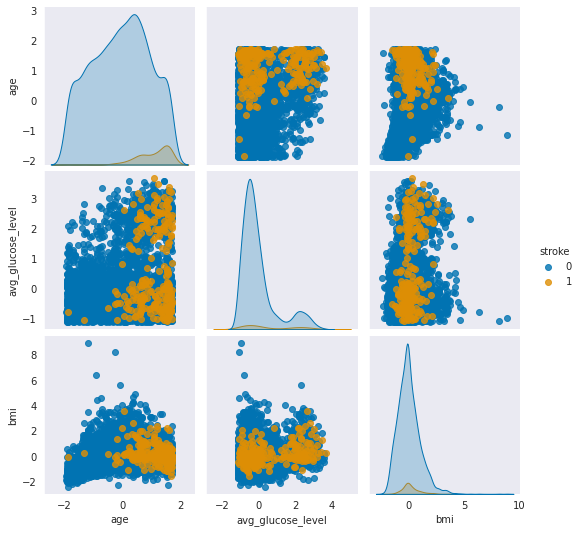

In [ ]:
sns.pairplot(df2, kind='reg', palette='colorblind', hue='stroke', \
             vars= ['age', 'avg_glucose_level', 'bmi'], plot_kws=\
             {'ci':None, 'line_kws': {'color':'red','lw': 0}});

We made this PairPlot notice the differences when using sampling methods down below. Notice how the density of the stroke cases varies low compared to non-stroke cases.

## Oversampling

In [ ]:
df_train, df_test = train_test_split(df2, test_size=0.25, stratify=df2['stroke'], random_state=2021)
features = df_train.drop(columns=['stroke']).columns

In [ ]:
print(df_train['stroke'].value_counts())
print(df_test['stroke'].value_counts())

0    3644
1     187
Name: stroke, dtype: int64
0    1216
1      62
Name: stroke, dtype: int64


After using the over-sampling method, we will see that that data is balanced by over-sampling the minority class, which in this case, the stroke class. **One important thing to notate is that we cannot over-sample the dataset before splitting it into training and testing. Because we might end up having the same variables in the training and testing sets.**

### Random Over Sampling

In [ ]:
ros = RandomOverSampler(random_state=2021)
X_resampled, y_resampled = ros.fit_resample(df_train[features], df_train['stroke'])
y_resampled.value_counts()

0    3644
1    3644
Name: stroke, dtype: int64

In [ ]:
X_train = X_resampled
X_test = df_test.drop(columns=['stroke'])
y_train = y_resampled
y_test=df_test['stroke']
lr = LogisticRegression(random_state=2021)
lr.fit(X_train,y_train)
y_pred =lr.predict(df_test[features])
y_prob =lr.predict_proba(df_test[features])[:,1]
print('Area Under ROC = ',roc_auc_score(y_test, y_prob))
print('Confusion Matrix = \n',confusion_matrix(y_test, y_pred))

Area Under ROC =  0.8621073853989814
Confusion Matrix = 
 [[882 334]
 [  5  57]]


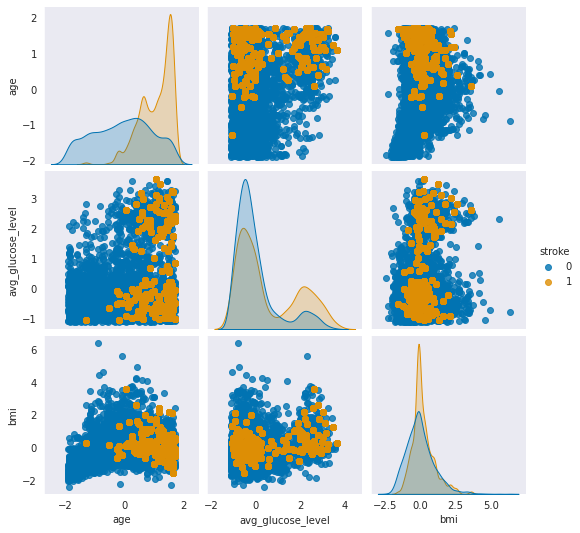

In [ ]:
sns.pairplot(pd.concat([X_resampled, y_resampled], axis='columns'), kind='reg', palette='colorblind', hue='stroke', \
             vars= ['age', 'avg_glucose_level', 'bmi'], plot_kws=\
             {'ci':None, 'line_kws': {'color':'red','lw': 0}});

### Over Sampling with Shrinkage

In [ ]:
ros_shrinkage = RandomOverSampler(random_state=2021, shrinkage=0.1)
X_resampled, y_resampled = ros_shrinkage.fit_resample(df_train[features],df_train['stroke'])
y_resampled.value_counts()

0    3644
1    3644
Name: stroke, dtype: int64

In [ ]:
X_train = X_resampled
X_test = df_test.drop(columns=['stroke'])
y_train = y_resampled
y_test=df_test['stroke']
lr = LogisticRegression(random_state=2021)
lr.fit(X_train,y_train)
y_pred =lr.predict(df_test[features])
y_prob =lr.predict_proba(df_test[features])[:,1]
print('Area Under ROC = ',roc_auc_score(y_test, y_prob))
print('Confusion Matrix = \n',confusion_matrix(y_test, y_pred))

Area Under ROC =  0.8527032045840407
Confusion Matrix = 
 [[1215    1]
 [  61    1]]


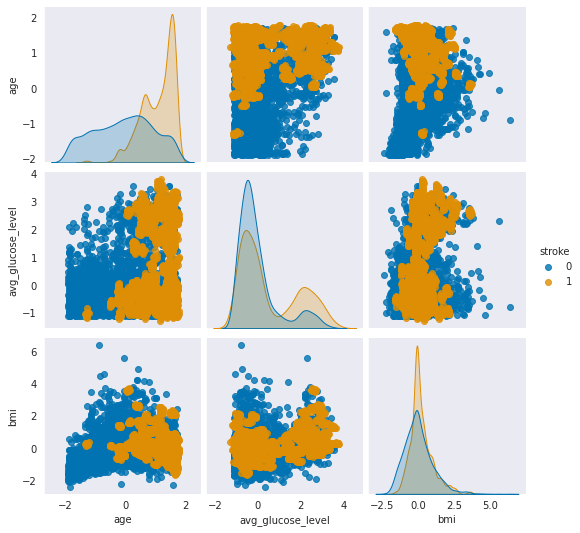

In [ ]:
sns.pairplot(pd.concat([X_resampled, y_resampled], axis='columns'), kind='reg', palette='colorblind', hue='stroke', \
             vars= ['age', 'avg_glucose_level', 'bmi'], plot_kws=\
             {'ci':None, 'line_kws': {'color':'red','lw': 0}});

### SMOTE Over Sampling

In [ ]:
smote = SMOTE(random_state=2021)
X_resampled, y_resampled = smote.fit_resample(df_train[features], df_train['stroke'])
y_resampled.value_counts()

0    3644
1    3644
Name: stroke, dtype: int64

In [ ]:
X_train = X_resampled
X_test = df_test.drop(columns=['stroke'])
y_train = y_resampled
y_test=df_test['stroke']
lr = LogisticRegression(random_state=2021)
lr.fit(X_train,y_train)
y_pred =lr.predict(df_test[features])
y_prob =lr.predict_proba(df_test[features])[:,1]
print('Area Under ROC = ',roc_auc_score(y_test, y_prob))
print('Confusion Matrix = \n',confusion_matrix(y_test, y_pred))

Area Under ROC =  0.8179647707979626
Confusion Matrix = 
 [[1081  135]
 [  32   30]]


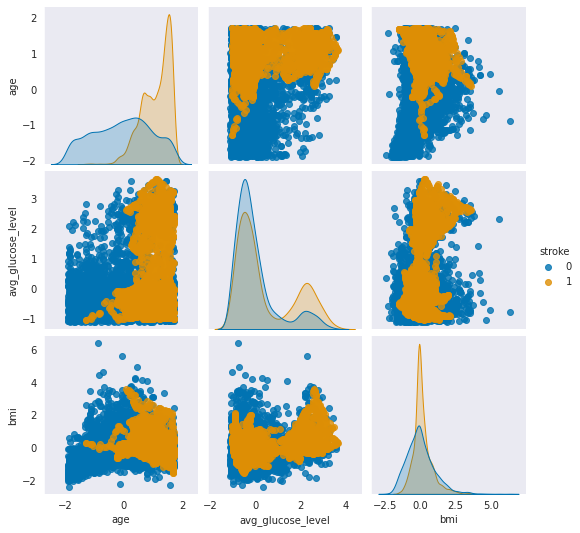

In [ ]:
sns.pairplot(pd.concat([X_resampled, y_resampled], axis='columns'), kind='reg', palette='colorblind', hue='stroke', \
             vars= ['age', 'avg_glucose_level', 'bmi'], plot_kws=\
             {'ci':None, 'line_kws': {'color':'red','lw': 0}});

## Combined Method

### SMOTE-Tomek

In [ ]:
smote_tomek = SMOTETomek(random_state=2021)
X_resampled, y_resampled =  smote_tomek.fit_resample(df_train[features], df_train['stroke'])
y_resampled.value_counts()

0    3629
1    3629
Name: stroke, dtype: int64

In [ ]:
X_train = X_resampled
X_test = df_test.drop(columns=['stroke'])
y_train = y_resampled
y_test=df_test['stroke']
lr = LogisticRegression(random_state=2021)
lr.fit(X_train,y_train)
y_pred =lr.predict(df_test[features])
y_prob =lr.predict_proba(df_test[features])[:,1]
print('Area Under ROC = ',roc_auc_score(y_test, y_prob))
print('Confusion Matrix = \n',confusion_matrix(y_test, y_pred))

Area Under ROC =  0.8185085950764006
Confusion Matrix = 
 [[1082  134]
 [  32   30]]


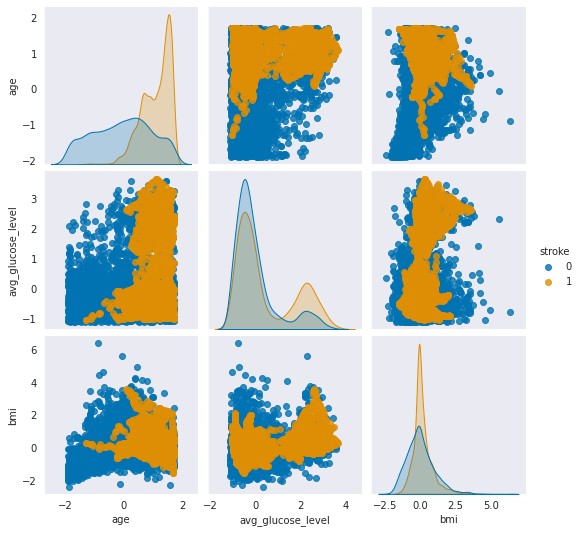

In [ ]:
sns.pairplot(pd.concat([X_resampled, y_resampled], axis='columns'), kind='reg', palette='colorblind', hue='stroke', \
             vars= ['age', 'avg_glucose_level', 'bmi'], plot_kws=\
             {'ci':None, 'line_kws': {'color':'red','lw': 0}});

# Train

We obviously will choose the RandomOverSampler method. Since the LogisticRegression classifier did best between other classifiers using other methods of over-sampling, based on the auc-roc and confusion matrices values.

In [ ]:
df_train, df_test = train_test_split(df2, test_size=0.25, stratify=df2['stroke'], random_state=2021)
features = df_train.drop(columns=['stroke']).columns
ros = RandomOverSampler(random_state=2021)
X_resampled, y_resampled = ros.fit_resample(df_train[features], df_train['stroke'])
X_train = X_resampled
X_test = df_test.drop(columns=['stroke'])
y_train = y_resampled
y_test=df_test['stroke']

In [ ]:
print('X_train dimensions= ',X_train.shape)
print('X_test dimensions= ',X_test.shape)
print('y_train dimensions= ',y_train.shape)
print('y_test dimensions= ',y_test.shape)

X_train dimensions=  (7288, 20)
X_test dimensions=  (1278, 20)
y_train dimensions=  (7288,)
y_test dimensions=  (1278,)


In [ ]:
def Classify(X_train, y_train, X_test, y_test,classifier):

  accuracy,precision,recall,f1,auc,conf_mat, time_elapsed= [],[],[],[],[],[],[]

  t =time.time()
  clf = classifier
  clf.fit(X_train,y_train)
  y_preds = clf.predict(X_test)
  y_probs = clf.predict_proba(X_test)
  time_elapsed.append(round((time.time()-t),3))

  accuracy.append((round(accuracy_score(y_test,y_preds),2))*100)
  precision.append((round(precision_score(y_test,y_preds),2))*100)
  recall.append((round(recall_score(y_test,y_preds),2))*100)
  f1.append((round(f1_score(y_test,y_preds),2))*100)
  auc.append((round(roc_auc_score(y_test,y_probs[:,1]), 2))*100)
  conf_mat.append(confusion_matrix(y_test,y_preds))

  results = pd.DataFrame({'Accuracy':accuracy,\
                          'Precision':precision,\
                          'Recall':recall,\
                          'F1 Score':f1,\
                          'AUC-ROC':auc,\
                          'Confusion Matrix':conf_mat,\
                          'Time Elapsed':time_elapsed})
  return results

In [ ]:
classifiers = {'LogisticRegression': LogisticRegression(random_state = 2021),\
        'XGBClassifier': XGBClassifier(random_state = 2021,eval_metric = 'logloss',learning_rate = 0.054),\
        'GradientBoostingClassifier': GradientBoostingClassifier(random_state=2021),\
        'LGBMClassifier': LGBMClassifier(random_state = 2021,learning_rate = 0.067)}

result = []
for classifier in classifiers.values():
  result.append(Classify(X_train, y_train, X_test, y_test, classifier))

result = pd.concat(result)
result.reset_index(inplace=True, drop=True)
result['Classifier'] =classifiers.keys()
result.set_index('Classifier')

,Accuracy,Precision,Recall,F1 Score,AUC-ROC,Confusion Matrix,Time Elapsed
Classifier,,,,,,,
LogisticRegression,73.0,15.0,92.0,25.0,86.0,"[[882, 334], [5, 57]]",0.119
XGBClassifier,72.0,13.0,84.0,23.0,84.0,"[[874, 342], [10, 52]]",0.602
GradientBoostingClassifier,78.0,14.0,71.0,24.0,83.0,"[[956, 260], [18, 44]]",0.904
LGBMClassifier,89.0,20.0,45.0,28.0,82.0,"[[1105, 111], [34, 28]]",0.217


It's time to choose the model that gives us the best performance for our study. The models were originally built to predict stroke cases based on simple EHR data. Since the model will be working with humans in the healthcare field, so the wrong predictions may lead to very bad situations. Furthermore, stroke is very dangerous and could lead to high mortality. So, we have to be more cautious about it. For this case, and based on the evaluation metrics of the four models above, **LogisticRegression** will be the best model to work as a stroke predictor. Although its accuracy is less than other models, it has the highest **recall** and a good value of **precision**, compared to other models. And this is what we want. Because even if the model predicted a lot of stroke cases which it turns out is a wrong prediction, the model will give us most of the true stroke cases. [Cassie Kozyrkov](https://www.youtube.com/watch?v=BYQQlCVt4aE), a chief decision scientist at Google, and [Kimberly Fessel](https://www.youtube.com/watch?v=qWfzIYCvBqo) present a great explanation of the [confusion matrix](https://www.youtube.com/watch?v=_cpiuMuFj3U&t=6s) and the trade-off between precision and recall.